# Number Recognition

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

## Import Data

In [16]:
number_data = load_digits()

In [17]:
number_data.images.shape

(1797, 8, 8)

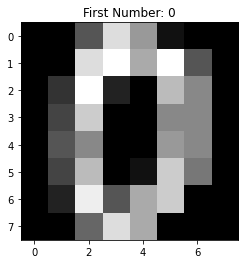

In [18]:
img = number_data.images[0]
label = number_data.target[0]

plt.imshow(img, cmap='gray')
plt.title(f'First Number: {label}')
plt.show()

In [19]:
# 8x8 digit Image
print("Array of Image:")
print(img)

print(f"Target/Label of Image: {label}")

# Length of Dataset
print(f"Number of Images: {len(number_data.images)}")

Array of Image:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Target/Label of Image: 0
Number of Images: 1797


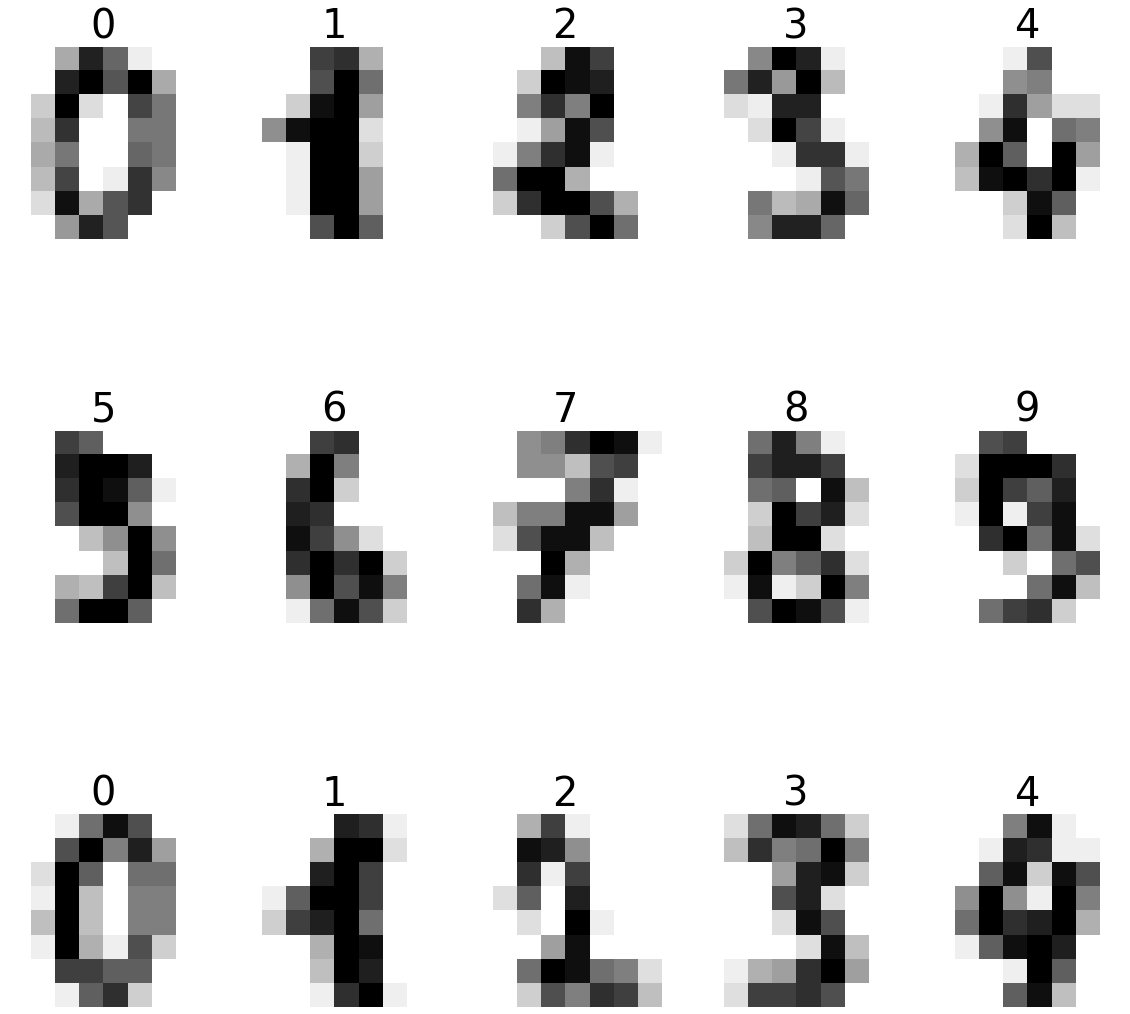

In [20]:
images_and_labels=list(zip(number_data.images,number_data.target))
plt.figure(figsize=(20,20))
for index,(image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap="gray_r")
    plt.title('%i' % label, fontsize=40)

## Definition of Variables

In [21]:
# Number of samples in the data set
n_samples=len(number_data.images)
print("Number of samples in the data set is :"+ str(n_samples))

x=number_data.images.reshape((n_samples,-1))
print("Shape of input matrix x is : "+ str(x.shape))

y=number_data.target
print("Shape of target vector y is :"+ str(y.shape))


Number of samples in the data set is :1797
Shape of input matrix x is : (1797, 64)
Shape of target vector y is :(1797,)


## Split Training and Test Data

In [22]:
# x: images, y: labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
len(y_test) + len(y_train)

1797

## Feature Scaling

### Normalisation
Normalisation, also known as min-max scaling, is a scaling technique whereby the values in a column are shifted so that they are bounded between a fixed range of 0 and 1.

### Standardisation
On the other hand, standardisation or Z-score normalisation is another scaling technique whereby the values in a column are rescaled so that they demonstrate the properties of a standard Gaussian distribution, that is mean = 0 and variance = 1.

Standardisation is generally preferred over normalisation in most machine learning context as it is especially important when comparing the similarities between features based on certain distance measures.

### Standard Scaler 
Rescales data so that they are distributed around the mean of 0.

In [24]:
X_train.shape

(1437, 64)

In [25]:
X_train

array([[ 0.,  0.,  0., ..., 16., 16.,  6.],
       [ 0.,  3., 12., ..., 16.,  2.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #fit data, then transform it
X_test = sc.transform(X_test) # already fitted with train data, only transform test data

In [27]:
X_test.shape

(360, 64)

## Convert training example to colom vector

In [28]:
X_train=X_train.T
X_test=X_test.T

In [29]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33790435,  2.90642897,  0.74354009, ..., -0.33790435,
        -0.33790435, -0.33790435],
       [-1.09141592,  1.41696421,  0.99890086, ..., -0.04625753,
        -0.25528921,  0.16277415],
       ...,
       [ 1.58325794,  1.58325794, -1.14493411, ..., -1.14493411,
        -1.14493411,  0.73069792],
       [ 3.53125595,  0.00595786, -0.49765616, ..., -0.49765616,
        -0.49765616, -0.49765616],
       [ 3.30213343, -0.18695903, -0.18695903, ..., -0.18695903,
        -0.18695903, -0.18695903]])

In [30]:
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T

In [31]:
y_train.shape

(1, 1437)

## Reshape the converting and testing data to the shape 10,1
* Output of model has 10 units (0-9)
* index with the highest prediction will represent the predicted number

In [32]:
Y_train_=np.zeros((10,y_train.shape[1]))
for i in range(y_train.shape[1]):
    Y_train_[y_train[0,i],i]=1
    
Y_test_=np.zeros((10,y_test.shape[1]))
for i in range(y_test.shape[1]):
    Y_test_[y_test[0,i],i]=1

In [33]:
Y_train_.shape

(10, 1437)

In [34]:
n_x=X_train.shape[0]
n_h=10
n_y=Y_train_.shape[0]

## Implementation of Neuronal Network

In [35]:
# initialize parameters for deep neural networks
def initialize_parameters_deep(layer_dims):
    """initializes parameter of convolutional neuronal network
    W: weights
    b: bias

    Args:
        layer_dims (list): [input features, hidden features per layer, hidden layers, output features] 

    Returns:
        dict: parametes
    """
    np.random.seed(3) #random initialization
    parameters = {}
    L = len(layer_dims) 
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01 # matrix lx(l-1)
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters

In [36]:
para = initialize_parameters_deep([64,60,10])

In [37]:
para.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [38]:
def linear_forward(A, W, b):
    """ Forward propagation without activation for a single layer
    """
    Z = np.dot(W,A)+b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [39]:
# use ful activation functions and their derivatives
def sigmoid_(Z):
    return 1/(1+np.exp(-Z))

def relu_(Z):
    return Z*(Z>0)

def drelu_(Z):
    return 1. *(Z>0)

def dsigmoid_(Z):
    return sigmoid_(Z)*(1-sigmoid_(Z))

def sigmoid(Z):
    return sigmoid_(Z),Z

def relu(Z):
    return relu_(Z),Z

In [40]:
def linear_activation_forward(A_prev,W,b,activation):
    """Forward propagation with activation for a single layer: 
    If the type of activation is sigmoid, it performs sigmoid activation function else performs relu activation function.
    """
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [41]:
# implementation of forward propogation for L layer neural network
def L_model_forward(X, parameters):
    """Output the final predicted vector of the output layer and some cache information

    chache: information which is used for backpropagation

    Returns:
        touple: AL, caches
    """
    caches = []
    A = X
    L = len(parameters) // 2   
    # For the first L-1 layers, we use relu as activation function and for the last layer, we use sigmoid activation function
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],"relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    #assert(AL.shape == (1,X.shape[1]))
    return AL, caches

In [42]:
# cost function
def compute_cost(AL, Y):
    m=Y.shape[1]
    cost = -(1/m)*np.sum((Y*np.log(AL)+(1-Y)*np.log(1-AL)))
    cost=np.squeeze(cost)
    assert(cost.shape == ())
    return cost

## Back Propagation

In [43]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [44]:
def relu_backward(dA,activation_cache):
    return dA* drelu_(activation_cache)

In [45]:
def sigmoid_backward(dA,activation_cache):
    return dA* dsigmoid_(activation_cache)

In [46]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev,dW,db

In [47]:
# back propogation for L layers
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

Here dA is the derivative of one particular layer’s activation. The linear_activaton_backward function takes dA and corresponding cache from linear_activation_forward function and outputs the derivative of the activations of the previous layer along with gradients dW and db. This dW, db are used for adjusting parameters W using gradient descent.

With backpropagation is successfully implemented we need to adjust the weights with the help of computed derivatives (dW and db).

In [48]:
#update parameters
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(learning_rate)*grads["dW"+str(l+1)] 
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(learning_rate)*grads["db"+str(l+1)]
    return parameters

# NN with 2 hidden layers and training of model
How to choose the number of hidden layers and nodes in a feedforward neural network?

**Input Layer: shape of your training data**
<br> 64 Pixel in each picture -> 64 input neurons

**Output Layer: determined by the chosen model configuration**
<br> Classifier: one node per class label -> 10 nodes because of 10 digits (0-9)

**Hidden Layers: nicht immer eindeutig -> Stellschraube**
<br>1. How many Layers? 
<br> The situations in which performance improves with a second (or third, etc.) hidden layer are very few. One hidden layer is sufficient for the large majority of problems.
<br>2. How many neurons per layer?
<br> The optimal size of the hidden layer is usually between the size of the input and size of the output layers: between 64 and 10 -> choose 37 because (64+10)/2 = 37
<br> Prevent overfitting by $N_h = \frac{N_s}{\alpha * (N_i + N_o)}$

<br> $N_h$ =  number of neurons in hidden layer.
<br> $N_i$ =  number of input neurons.
<br> $N_o$ =  number of output neurons.
<br> $N_s$ =  number of samples in training data set.
<br> $\alpha$ =  an arbitrary scaling factor usually 2-10.

**Rules-of-thumb for hidden layers**
1. number of hidden layers equals one.
2. the number of neurons in that layer is the mean of the neurons in the input and output layers. 



In [67]:
# N layer neural network
layers_dims=[n_x, 37,10]
costs = [] 
learning_rate = 0.005
def L_layer_model(X, Y, layers_dims, learning_rate = 0.005, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    
    return parameters

In [69]:
parameters = L_layer_model(X_train, Y_train_, layers_dims, num_iterations = 30000, print_cost = True)

Cost after iteration 0: 6.929388
Cost after iteration 1000: 2.338469
Cost after iteration 2000: 1.127172
Cost after iteration 3000: 0.708531
Cost after iteration 4000: 0.495387
Cost after iteration 5000: 0.381673
Cost after iteration 6000: 0.314106
Cost after iteration 7000: 0.268470
Cost after iteration 8000: 0.234832
Cost after iteration 9000: 0.208566
Cost after iteration 10000: 0.187221
Cost after iteration 11000: 0.169500
Cost after iteration 12000: 0.154654
Cost after iteration 13000: 0.141985
Cost after iteration 14000: 0.131052
Cost after iteration 15000: 0.121526
Cost after iteration 16000: 0.113140
Cost after iteration 17000: 0.105697
Cost after iteration 18000: 0.099044
Cost after iteration 19000: 0.093070
Cost after iteration 20000: 0.087649
Cost after iteration 21000: 0.082697
Cost after iteration 22000: 0.078179
Cost after iteration 23000: 0.074037
Cost after iteration 24000: 0.070240
Cost after iteration 25000: 0.066743
Cost after iteration 26000: 0.063515
Cost after ite

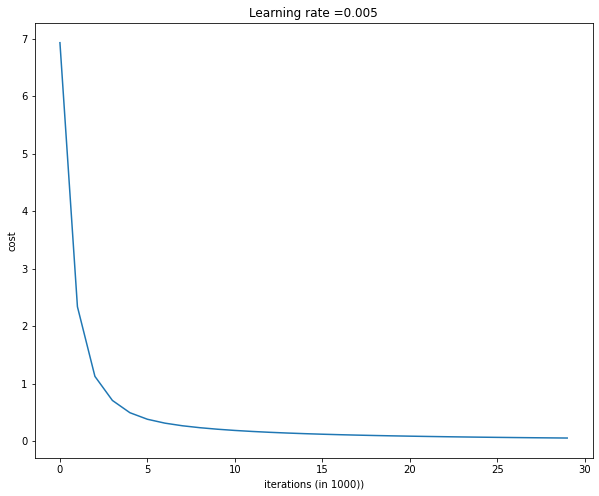

In [73]:
# plot the cost
plt.figure(figsize=(10,8))
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (in 1000))')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [51]:
def predict_L_layer(X,parameters):
    AL, _ =L_model_forward(X,parameters)
    prediction=np.argmax(AL,axis=0)
    return prediction.reshape(1,prediction.shape[0])

In [52]:
predictions_train_L = predict_L_layer(X_train, parameters)

In [53]:
print("Training Accuracy : "+ str(np.sum(predictions_train_L==y_train)/y_train.shape[1] * 100)+" %")

Training Accuracy : 100.0 %


In [54]:
predictions_test_L=predict_L_layer(X_test,parameters)

In [55]:
print("Testing Accuracy : "+ str(np.sum(predictions_test_L==y_test)/y_test.shape[1] * 100)+" %")

Testing Accuracy : 98.05555555555556 %


In [56]:
np.save('./training_model/model.npy',parameters)

In [57]:
loaded_parameter_array = np.load('./training_model/model.npy', allow_pickle=True)

In [58]:
loaded_parameters = dict()
for key, key_d in loaded_parameter_array.item().items():
    print(key, key_d)
    loaded_parameters[key] = key_d

W1 [[ 0.01788628 -0.00327869 -0.09674934 ... -0.07661276 -0.07392524
  -0.11665653]
 [-0.00674728 -0.02410656  0.06829751 ... -0.01068886 -0.00674229
  -0.12621237]
 [-0.00648411 -0.10114326 -0.27758722 ...  0.02394125 -0.03476629
  -0.13610243]
 ...
 [ 0.01105436 -0.05011353 -0.02085722 ... -0.21269063 -0.18676765
  -0.10275314]
 [-0.00951221  0.03039849  0.09137619 ...  0.32139734  0.19744251
   0.01602954]
 [ 0.00987873 -0.23100563  0.09119874 ...  0.01191416 -0.06533897
   0.32485285]]
b1 [[0.39103497]
 [0.43511869]
 [0.35885332]
 [0.12994087]
 [0.27294792]
 [0.26432392]
 [0.30885949]
 [0.48487084]
 [0.22384781]
 [0.38771423]
 [0.20711809]
 [0.10742618]
 [0.29615731]
 [0.31541113]
 [0.67605694]
 [0.51687117]
 [0.17422572]
 [0.24007438]
 [0.47407741]
 [0.4137644 ]
 [0.32546862]
 [0.1846132 ]
 [0.16307887]
 [0.64298569]
 [0.15783987]
 [0.30477148]
 [0.55937046]
 [0.40033524]
 [0.16857991]
 [0.65980201]
 [0.40781276]
 [0.18483271]
 [0.01392229]
 [0.32053168]
 [0.48376567]
 [0.48074781

In [59]:
loaded_img = plt.imread("./data/img/img_20211023-134501_2.png")

In [60]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

In [61]:
gray_img = rgb2gray(loaded_img)

In [62]:
grayimg1 = rebin(gray_img, (8,8))/255*16

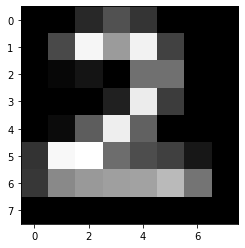

In [63]:
plt.imshow(grayimg1, cmap='gray')
plt.show()

In [64]:
training_img=grayimg1.reshape((64,1)).T
training_img = sc.transform(training_img)
training_img=training_img.T
predicted_digit=predict_L_layer(training_img,parameters)
print('Predicted digit is : '+str(np.squeeze(predicted_digit)[()]))

Predicted digit is : 4


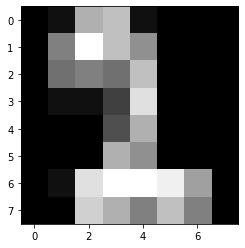

Predicted digit is : [[2]]
True digit is: 2


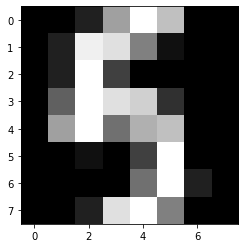

Predicted digit is : [[5]]
True digit is: 5


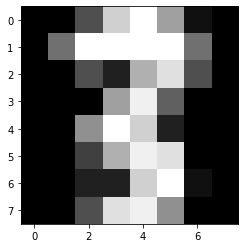

Predicted digit is : [[3]]
True digit is: 3


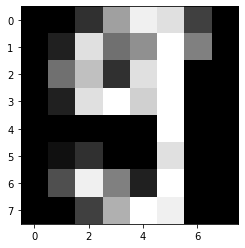

Predicted digit is : [[9]]
True digit is: 9


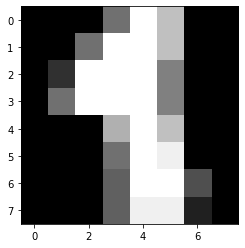

Predicted digit is : [[1]]
True digit is: 1


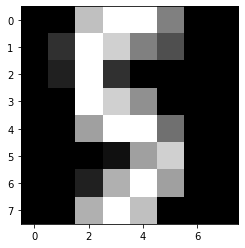

Predicted digit is : [[5]]
True digit is: 5


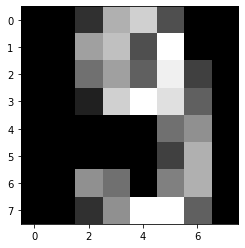

Predicted digit is : [[9]]
True digit is: 9


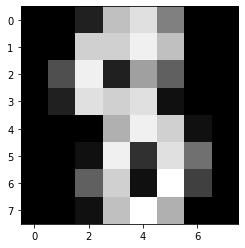

Predicted digit is : [[8]]
True digit is: 8


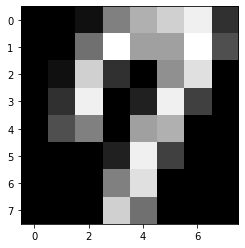

Predicted digit is : [[7]]
True digit is: 7


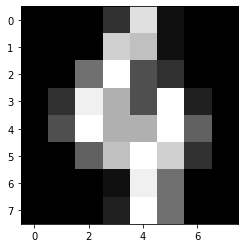

Predicted digit is : [[4]]
True digit is: 4


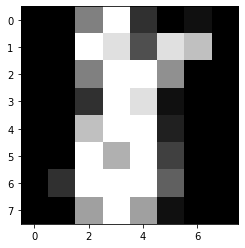

Predicted digit is : [[8]]
True digit is: 8


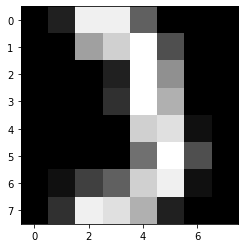

Predicted digit is : [[3]]
True digit is: 3


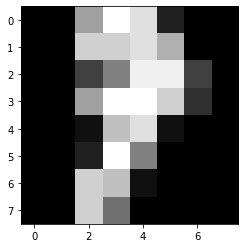

Predicted digit is : [[7]]
True digit is: 7


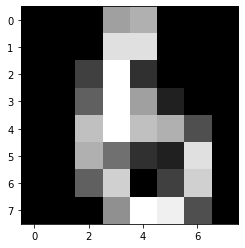

Predicted digit is : [[6]]
True digit is: 6


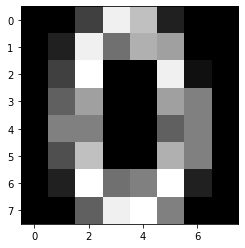

Predicted digit is : [[0]]
True digit is: 0


In [65]:
import random
for j in range(15):
    i=random.randint(0,n_samples)
    plt.imshow(number_data.images[i],  cmap='gray')
    plt.show()
      
    training_img=number_data.images[i].reshape((64,1)).T
    training_img = sc.transform(training_img)
    training_img=training_img.T
    predicted_digit=predict_L_layer(training_img,parameters)
    print('Predicted digit is : '+str(predicted_digit))
    print('True digit is: '+ str(y[i]))